# Biweekly Report

# Jake Watts

# CIFAR-10 Exploratory Data Analysis

For the second report I wanted to try a new dataset. On the first report I explored and trained a model using the MNIST dataset. For this report I wanted to use a more complex dataset. The CIFAR-10 datset contains images with color rather than just black and white images and the categories to predict are more complicated and therefore I anticipate them to be more challenging. For theses reason I believe it will more interesting to work with this dataset.

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 67s 0us/step


The training dataset for CIFAR-10 contains 50,000 images.

In [ ]:
len(x_train)

50000

The training dataset for CIFAR-10 contains 10,000 images.

In [ ]:
len(x_test)

10000

Using shape we can get more information regarding the structure of the data. It tells us that the images are 32x32 with 3 channels.

In [ ]:
x_train.shape

(50000, 32, 32, 3)

Here I print some of the data from the first image just to get a better idea of how the structure of the data differs from the MNIST dataset since it has 3 chaneels rather than one. For each image there 32 groups of arrays containing 32 vectors with 3 values, one for each channel. The values for pixels values from 0 to 255.

In [ ]:
x_train[0][0:2] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        [ 68,  54,  42],
        [ 98,  73,  52],
        [119,  91,  63],
        [139, 107,  75],
        [145, 110,  80],
        [149, 117,  89],
        [149, 120,  93],
        [131, 103,  77],
        [125,  99,  76],
        [142, 115,  91],
        [144, 112,  86],
        [137, 105,  79],
        [129,  97,  71],
        [137, 106,  79],
        [134, 106,  76],
        [124,  97,  64],
        [139, 113,  78],
        [139, 112,  75],
        [133, 105,  69],
        [136, 105,  74],
        [139, 108,  77],
        [152, 120,  89],
        [163, 131, 100],
        [168, 136, 108],
        [159, 129, 102],
        [158, 130, 104],
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        [ 51,  27,   8],
        [ 88,  51,  21],
        [120,  82,  43],
        [128,  89,  45],
        [127,  86,  44]

Here I plot the first 25 images in the dataset. These images have fairly low resolutions and I imagine that this will result in more diffuclty in training a model since the image quality makes it harder for me to tell what each image represents.

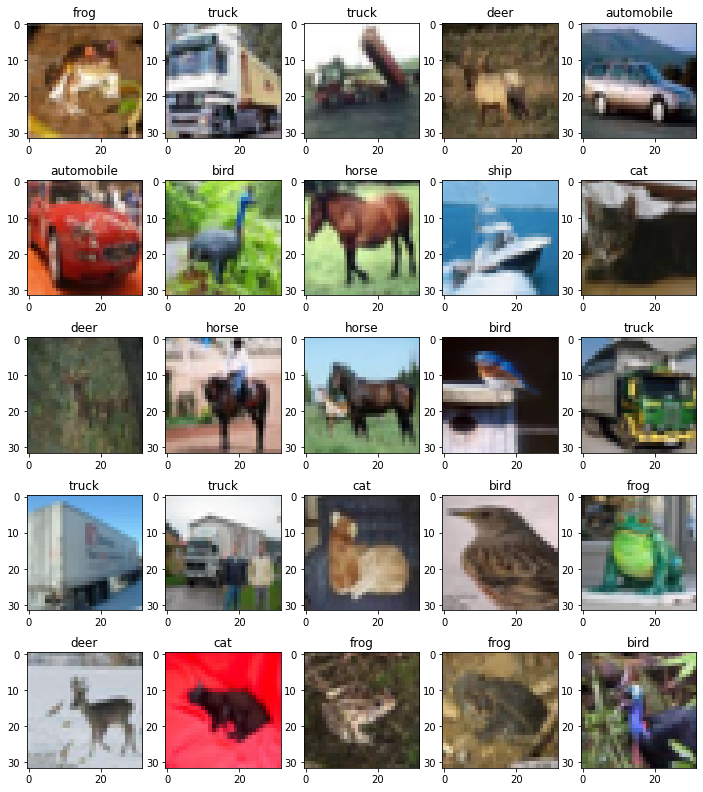

In [7]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

figure = plt.figure(figsize=(12, 14))

for i in range(25):
  plt.subplot(5, 5, i+1)
  label_index = y_train[i][0]
  label = labels[label_index]
  plt.imshow(x_train[i])
  plt.title(label)
plt.show()

Looking at the histogram of the training label frequency, it appears that the datset is split evenly. Each category has 5,000 images representing 10% of the data each. This is more balanced than mnist where each category was roughly 10% but not exactly.

Text(0.5, 1.0, 'Training Label Distribution')

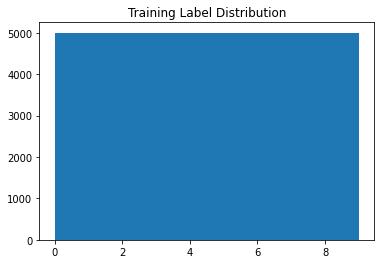

In [ ]:
plt.hist(y_train)
plt.title('Training Label Distribution')

The following function was taken from github for random erasing (https://github.com/yu4u/cutout-random-erasing/blob/master/random_eraser.py). The function takes inputs of images and randomly erases a part of an image with probability 0.5 and replaces it with a gray-scale rectangle of varying sizes and locations. The goal of random erasing is to reduce the risk of overfitting and make the model more robust in cases where the key image is partially blocked.

There is also an option for pixel-level random erasing where blocks of pixels for erased areas will have different color pixels rather than block of a single color.

In [4]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

Below we can visualize what happens when the function is applied to the first 25 images of the dataset. It is applied to approximately half of the images in the dataset. We can also see that the images are obstructed to different degrees. For example, the deer in the bottom left corner is almost entirely obstructed while cat on the same row which also is partially erased remains unobstructed.

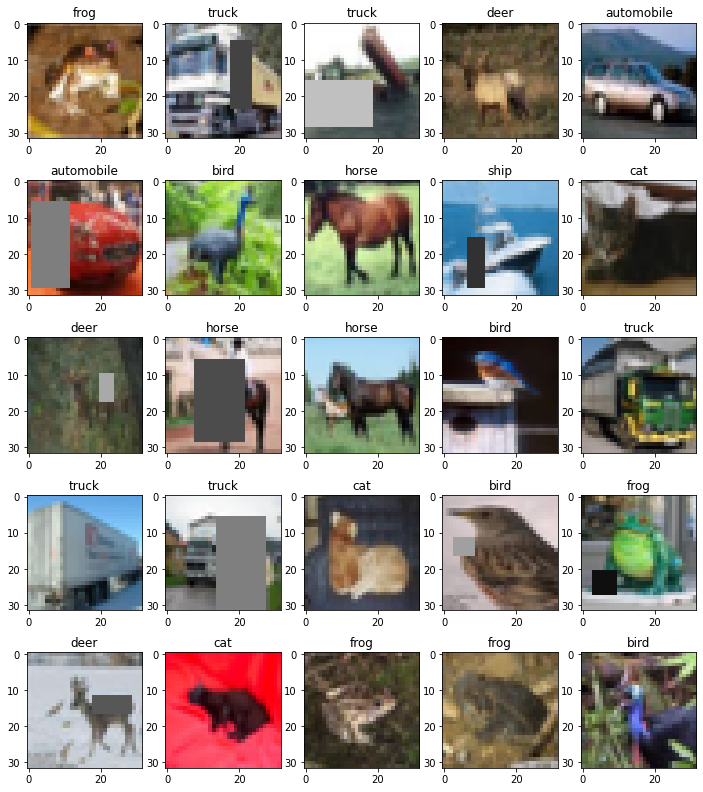

In [8]:
eraser = get_random_eraser()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

figure = plt.figure(figsize=(12, 14))

for i in range(25):
  plt.subplot(5, 5, i+1)
  label_index = y_train[i][0]
  label = labels[label_index]
  eraser(x_train[i])
  plt.imshow(x_train[i])
  plt.title(label)
plt.show()

Pixel level is similar, the only difference being that instead of all the pixels being erased with the same random color, each pixel is randomly replaced with a different color.

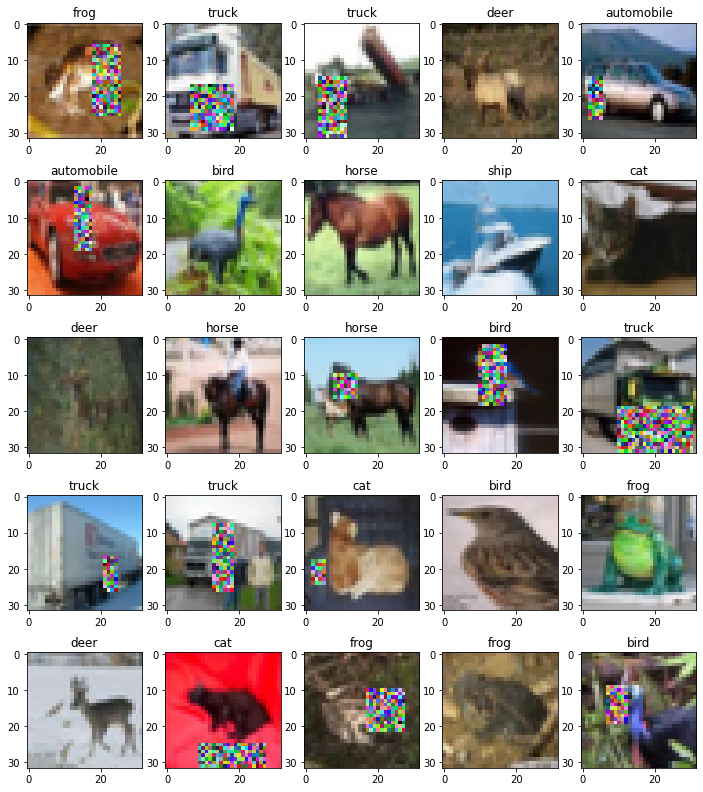

In [9]:
eraser = get_random_eraser(pixel_level=True)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

figure = plt.figure(figsize=(12, 14))

for i in range(25):
  plt.subplot(5, 5, i+1)
  label_index = y_train[i][0]
  label = labels[label_index]
  eraser(x_train[i])
  plt.imshow(x_train[i])
  plt.title(label)
plt.show()

# Summary

This dataset has more complex images to classify compared to the MNIST dastaset. As a result I believe that the accuracy of models on this datset will be lower. Their is also a fairly small amount of pixels per image. I think this may make it easier to train however more difficult to classify images in certain cases. In addition, I believe the use of random erasing will make models more robust and therefore improve model performance.